In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
print(tf.__version__)

1.12.0


In [12]:
imdb= keras.datasets.imdb

In [14]:
(X_train, y_train), (X_test, y_test)= imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 11s 1us/step


In [15]:
word_index= imdb.get_word_index()

1646592/1641221 [==============================] - 3s 2us/step


### Explore the data

In [16]:
X_train.shape

(25000,)

In [17]:
y_train.shape

(25000,)

In [19]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [20]:
print(X_test[0])


[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]


In [22]:
type(word_index)

dict

In [23]:
len(word_index)

88584

In [36]:
word_index.get('nice')

324

In [38]:
type(word_index.items())

dict_items

### Convert integet back to words

In [39]:
word_index= {word:index+3 for word, index in word_index.items()}

In [40]:
word_index.get('nice')

327

In [41]:
word_index['<PAD>']= 0
word_index['<START>']= 1
word_index['<UNK>']= 2 #Unknown
word_index['<UNUSED>']= 3

In [44]:
reverse_word_index= dict([(value, key) for key, value in word_index.items()])

In [46]:
reverse_word_index.get(327)

'nice'

In [47]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [48]:
decode_review(X_train[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life"

### Prepare the data

In [49]:
MAX_LEN= 256
X_train= keras.preprocessing.sequence.pad_sequences(X_train,
                                                  maxlen= MAX_LEN,
                                                  value= word_index['<PAD>'],
                                                  padding= 'post')
X_test= keras.preprocessing.sequence.pad_sequences(X_test,
                                                  maxlen= MAX_LEN,
                                                  value= word_index['<PAD>'],
                                                  padding= 'post')

In [51]:
print(X_train[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [52]:
print(X_test[0])

[   1  591  202   14   31    6  717   10   10    2    2    5    4  360
    7    4  177 5760  394  354    4  123    9 1035 1035 1035   10   10
   13   92  124   89  488 7944  100   28 1668   14   31   23   27 7479
   29  220  468    8  124   14  286  170    8  157   46    5   27  239
   16  179    2   38   32   25 7944  451  202   14    6  717    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### Build the model

In [55]:
vocab_size= 10000

In [56]:
model= keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation= tf.nn.relu))
model.add(keras.layers.Dense(1, activation= tf.nn.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


#### Loss function and Optimizer

In [58]:
model.compile(optimizer= tf.train.AdamOptimizer(),
             loss= 'binary_crossentropy',
             metrics= ['accuracy'])

#### Validation set

In [59]:
len(X_train)

25000

In [60]:
X_val= X_train[:10000]
X_train_partial= X_train[10000:]

y_val= y_train[:10000]
y_train_partial= y_train[10000:]

### Train the model

In [61]:
history= model.fit(X_train_partial,
                  y_train_partial,
                  epochs= 40,
                  batch_size= 512,
                  validation_data= (X_val, y_val),
                  verbose= 1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 204us/step - loss: 0.6920 - acc: 0.6264 - val_loss: 0.6902 - val_acc: 0.6961
Epoch 2/40
15000/15000 [==============================] - 1s 83us/step - loss: 0.6858 - acc: 0.6832 - val_loss: 0.6811 - val_acc: 0.7377
Epoch 3/40
15000/15000 [==============================] - 1s 81us/step - loss: 0.6722 - acc: 0.7582 - val_loss: 0.6648 - val_acc: 0.7474
Epoch 4/40
15000/15000 [==============================] - 1s 86us/step - loss: 0.6490 - acc: 0.7727 - val_loss: 0.6392 - val_acc: 0.7588
Epoch 5/40
15000/15000 [==============================] - 1s 84us/step - loss: 0.6152 - acc: 0.7946 - val_loss: 0.6031 - val_acc: 0.7882
Epoch 6/40
15000/15000 [==============================] - 1s 80us/step - loss: 0.5725 - acc: 0.8148 - val_loss: 0.5618 - val_acc: 0.8070
Epoch 7/40
15000/15000 [==============================] - 1s 79us/step - loss: 0.5249 - acc: 0.8359 - val_loss: 0.5184 - val_ac

### Evaluate the model

In [62]:
result= model.evaluate(X_test, y_test)
print(result)

25000/25000 [==============================] - 1s 31us/step
[0.33475961338996885, 0.87232]


In [63]:
history_dict= history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [65]:
acc, val_acc= history_dict['acc'], history_dict['val_acc']
loss, val_loss= history_dict['loss'], history_dict['val_loss']

In [66]:
epochs= range(1, len(acc)+1)

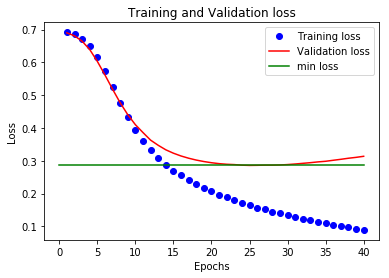

In [72]:
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.plot([0, 40], [np.min(val_loss), np.min(val_loss)], 'g', label='min loss')
plt.title('Training and Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

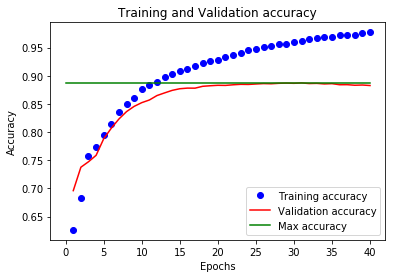

In [74]:
plt.clf()
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.plot([0, 40], [np.max(val_acc), np.max(val_acc)], 'g', label= 'Max accuracy')
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [88]:
y_pred= model.predict(X_test[:5])
print("Prediction",y_pred.flatten())
print("True", y_test[:5])
print(decode_review(X_test[0]))

Prediction [0.08059074 0.9986308  0.72900003 0.7529141  0.9939182 ]
True [0 1 1 0 1]
<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

# DONE